In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as sci
import matplotlib.pyplot as matplt
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as matlab
%matplotlib inline

In [2]:
# class attributes
tubes2_HeartDisease_train = pd.read_csv(r'Downloads/tubes2_HeartDisease_train.csv')
tubes2_HeartDisease_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


In [3]:
#checking Data Types
tubes2_HeartDisease_train.dtypes

Column1      int64
Column2      int64
Column3      int64
Column4     object
Column5     object
Column6     object
Column7     object
Column8     object
Column9     object
Column10    object
Column11    object
Column12    object
Column13    object
Column14     int64
dtype: object

In [ ]:
#changing data types
tubes2_HeartDisease_train['Column4'] = pd.to_numeric(tubes2_HeartDisease_train['Column4'], errors = 'coerce')
tubes2_HeartDisease_train['Column5'] = pd.to_numeric(tubes2_HeartDisease_train['Column5'], errors = 'coerce')
tubes2_HeartDisease_train['Column6'] = pd.to_numeric(tubes2_HeartDisease_train['Column6'], errors = 'coerce')
tubes2_HeartDisease_train['Column7'] = pd.to_numeric(tubes2_HeartDisease_train['Column7'], errors = 'coerce')
tubes2_HeartDisease_train['Column8'] = pd.to_numeric(tubes2_HeartDisease_train['Column8'], errors = 'coerce')
tubes2_HeartDisease_train['Column9'] = pd.to_numeric(tubes2_HeartDisease_train['Column9'], errors = 'coerce')
tubes2_HeartDisease_train['Column10'] = pd.to_numeric(tubes2_HeartDisease_train['Column10'], errors = 'coerce')
tubes2_HeartDisease_train['Column11'] = pd.to_numeric(tubes2_HeartDisease_train['Column11'], errors = 'coerce')
tubes2_HeartDisease_train['Column12'] = pd.to_numeric(tubes2_HeartDisease_train['Column12'], errors = 'coerce')
tubes2_HeartDisease_train['Column13'] = pd.to_numeric(tubes2_HeartDisease_train['Column13'], errors = 'coerce')



In [ ]:
tubes2_HeartDisease_train.dtypes

In [ ]:
tubes2_HeartDisease_train.head()

In [ ]:
len(tubes2_HeartDisease_train.index)

In [ ]:
# change attribute name
tubes2_HeartDisease_train.rename(columns={'Column1' : 'age', 'Column2' : 'sex', 'Column3' : 'chest_pain_type', 'Column4' : 'resting_bp', 'Column5' : 'ser_chol', 'Column6' : 'fast_glucose', 'Column7' : 'rest_ecg', 'Column8' : 'heart_rate', 'Column9' : 'exc_angina', 'Column10' : 'depression', 'Column11' : 'peak_exc', 'Column12' : 'maj_vessels', 'Column13' : 'thal', 'Column14' : 'heart_disease'}, inplace = True)
tubes2_HeartDisease_train.head()

In [17]:
#checking missing values
tubes2_HeartDisease_train.isnull().sum()

age                  0
sex                  0
chest_pain_type      0
resting_bp          47
ser_chol            24
fast_glucose        78
rest_ecg             2
heart_rate          44
exc_angina          44
depression          49
peak_exc           262
maj_vessels        514
thal               408
heart_disease        0
dtype: int64

In [18]:
count = 0
for i in tubes2_HeartDisease_train.isnull().sum(axis = 1):
    if i > 0:
        count = count + 1
print("%i instances have missing values which is %i%% of the total data" %(count, round((float(count)/len(tubes2_HeartDisease_train.index))*100)))

523 instances have missing values which is 67% of the total data


In [19]:
tubes2_HeartDisease_train.drop(columns = ['peak_exc', 'maj_vessels', 'thal'], inplace = True)



In [20]:
tubes2_HeartDisease_train.isnull().sum()

age                 0
sex                 0
chest_pain_type     0
resting_bp         47
ser_chol           24
fast_glucose       78
rest_ecg            2
heart_rate         44
exc_angina         44
depression         49
heart_disease       0
dtype: int64

In [21]:
#checking total instance
count = 0
for i in tubes2_HeartDisease_train.isnull().sum(axis = 1):
    if i > 0:
        count = count + 1
print("%i instances have missing values which is %i%% of the total data" % (count, round((float(count)/len(tubes2_HeartDisease_train.index))*100)))


149 instances have missing values which is 19% of the total data


In [22]:
tubes2_HeartDisease_train.dropna(inplace = True)

In [23]:
#checking missing values
tubes2_HeartDisease_train.isnull().sum()

age                0
sex                0
chest_pain_type    0
resting_bp         0
ser_chol           0
fast_glucose       0
rest_ecg           0
heart_rate         0
exc_angina         0
depression         0
heart_disease      0
dtype: int64

In [24]:
len(tubes2_HeartDisease_train.index)

630

In [25]:
tubes2_HeartDisease_train['heart_disease'] = (tubes2_HeartDisease_train['heart_disease'] >= 1).astype(int)

In [26]:
tubes2_HeartDisease_train.dtypes

age                  int64
sex                  int64
chest_pain_type      int64
resting_bp         float64
ser_chol           float64
fast_glucose       float64
rest_ecg           float64
heart_rate         float64
exc_angina         float64
depression         float64
heart_disease        int64
dtype: object

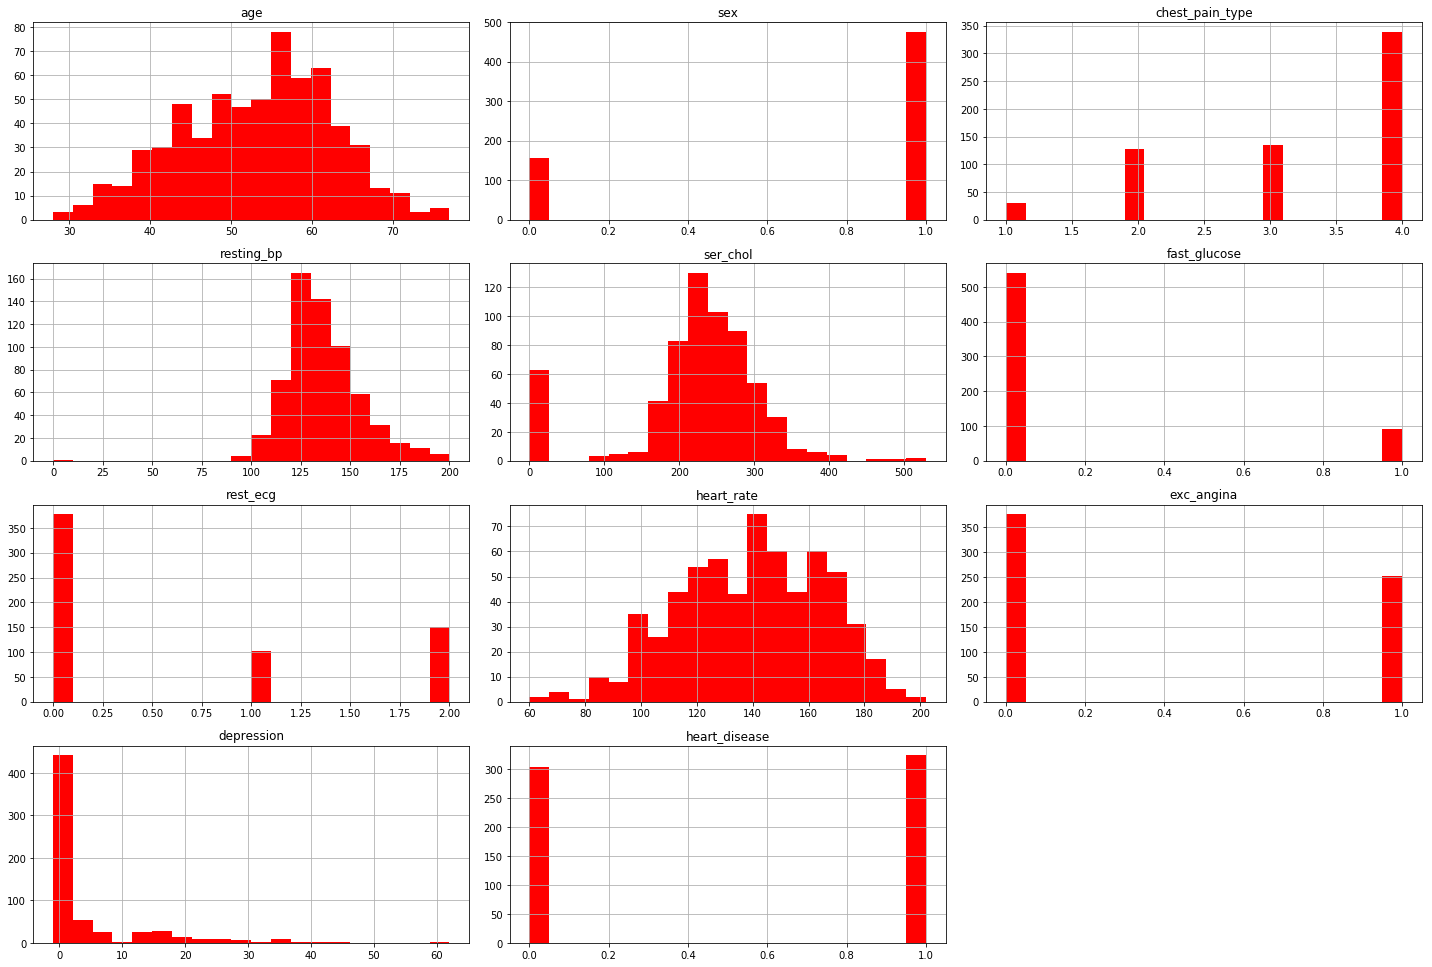

In [27]:
#visualizing  
def histograms(df, ft, rw, cl):
    fig = matplt.figure(figsize = (20,20))
    for i, feature in enumerate (ft):
        ax = fig.add_subplot(rw, cl, i+1)
        df[feature].hist(bins = 20, ax = ax, facecolor = 'red')
        ax.set_title(feature)
    fig.tight_layout()
    matplt.show()
histograms(tubes2_HeartDisease_train, tubes2_HeartDisease_train.columns, 6, 3)



1    51.587302
0    48.412698
Name: heart_disease, dtype: float64

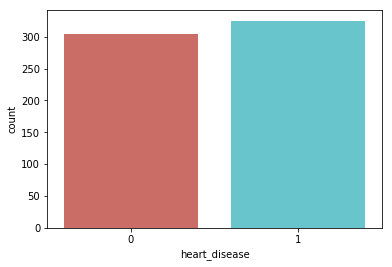

In [28]:
#class balance-imbalane check
sb.countplot(x = tubes2_HeartDisease_train['heart_disease'], data = tubes2_HeartDisease_train, palette = 'hls')
(tubes2_HeartDisease_train['heart_disease'].value_counts()/tubes2_HeartDisease_train['heart_disease'].count())*100

In [29]:
tubes2_HeartDisease_train.describe()



,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,heart_disease
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,53.114286,0.753968,3.241270,132.747619,223.007937,0.142857,0.638095,139.358730,0.401587,4.417460,0.515873
std,9.458618,0.431039,0.934523,18.664253,91.151885,0.350205,0.841573,26.114671,0.490609,8.253263,0.500145
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000
25%,46.000000,1.000000,3.000000,120.000000,198.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,234.500000,0.000000,0.000000,140.000000,0.000000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,274.000000,0.000000,1.000000,160.000000,1.000000,3.750000,1.000000
max,77.000000,1.000000,4.000000,200.000000,529.000000,1.000000,2.000000,202.000000,1.000000,62.000000,1.000000


In [30]:
#logistic regression implementation
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = tubes2_HeartDisease_train.iloc[:,:-1]
y = tubes2_HeartDisease_train.iloc[:,-1]

# train_test_split will return the 4 array
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

# fit the model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# predict disease from x_test set
y_pred = logreg.predict(x_test)

accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)

print('Accuracy of logistic Regression classifier on test set is: {}%'.format(round(accuracy,2)*100))

Accuracy of logistic Regression classifier on test set is: 80.0%


In [32]:
#total number of predictions
y_pred_count = np.unique(y_pred, return_counts = True)
y_pred_count

(array([0, 1]), array([76, 82]))

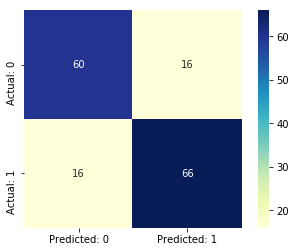

In [33]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cfmx = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cfmx, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])

sb.heatmap(data = conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu", square = True)

In [34]:
TN = cfmx[0,0]
TP = cfmx[1,1]
FN = cfmx[1,0]
FP = cfmx[0,1]

print("The confusion matrix shows %i correct predictions and %i incorrect predictions" % ((TN + TP), (FN + FP)))


The confusion matrix shows 126 correct predictions and 32 incorrect predictions


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.79      0.79        76
          1       0.80      0.80      0.80        82

avg / total       0.80      0.80      0.80       158



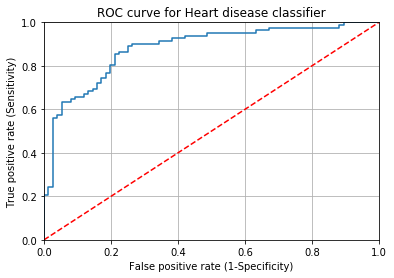

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

matplt.plot(fpr,tpr)
matplt.xlim([0.0, 1.0])
matplt.ylim([0.0, 1.0])
matplt.plot([0, 1], [0, 1], 'r--')
matplt.title('ROC curve for Heart disease classifier')
matplt.xlabel('False positive rate (1-Specificity)')
matplt.ylabel('True positive rate (Sensitivity)')
matplt.grid(True)

In [37]:
#ROC curve coverage area
roc_auc_score = sklearn.metrics.roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])

if roc_auc_score >= 0.70:
    print("ROC Curve Covers almost %i%% Area" % (round(roc_auc_score, 2)*100))
else:
     print("ROC Curve Covers almost %i%% Area Which is not Satisfactory" % (round(roc_auc_score, 2)*100))  


ROC Curve Covers almost 88% Area


In [38]:
x_test['y_test'] = y_test
x_test['y_pred'] = y_pred

x_test = x_test.drop(x_test[x_test.y_test == x_test.y_pred].index)

x_test.head()

/home/ashitha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ashitha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,y_test,y_pred
119,49,1,3,115.0,265.0,0.0,0.0,175.0,0.0,0.0,1,0
362,39,1,4,110.0,280.0,0.0,0.0,150.0,0.0,0.0,1,0
97,46,1,1,140.0,272.0,1.0,0.0,175.0,0.0,2.0,1,0
475,44,1,4,110.0,197.0,0.0,2.0,177.0,0.0,0.0,1,0
127,51,0,4,114.0,258.0,1.0,2.0,96.0,0.0,1.0,0,1


In [39]:
#load test data
tubes2_HeartDisease_test = pd.read_csv(r'Downloads/tubes2_HeartDisease_test.csv')
tubes2_HeartDisease_test.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


In [40]:
tubes2_HeartDisease_test.dtypes

Column1      int64
Column2      int64
Column3      int64
Column4     object
Column5     object
Column6     object
Column7      int64
Column8     object
Column9     object
Column10    object
Column11    object
Column12    object
Column13    object
dtype: object

In [41]:
tubes2_HeartDisease_test['Column4'] = pd.to_numeric(tubes2_HeartDisease_test['Column4'], errors = 'coerce')
tubes2_HeartDisease_test['Column5'] = pd.to_numeric(tubes2_HeartDisease_test['Column5'], errors = 'coerce')
tubes2_HeartDisease_test['Column6'] = pd.to_numeric(tubes2_HeartDisease_test['Column6'], errors = 'coerce')
tubes2_HeartDisease_test['Column8'] = pd.to_numeric(tubes2_HeartDisease_test['Column8'], errors = 'coerce')
tubes2_HeartDisease_test['Column9'] = pd.to_numeric(tubes2_HeartDisease_test['Column9'], errors = 'coerce')
tubes2_HeartDisease_test['Column10'] = pd.to_numeric(tubes2_HeartDisease_test['Column10'], errors = 'coerce')
tubes2_HeartDisease_test['Column11'] = pd.to_numeric(tubes2_HeartDisease_test['Column11'], errors = 'coerce')
tubes2_HeartDisease_test['Column12'] = pd.to_numeric(tubes2_HeartDisease_test['Column12'], errors = 'coerce')
tubes2_HeartDisease_test['Column13'] = pd.to_numeric(tubes2_HeartDisease_test['Column13'], errors = 'coerce')

In [42]:
tubes2_HeartDisease_test.rename(columns={'Column1' : 'age', 'Column2' : 'sex', 'Column3' : 'chest_pain_type', 'Column4' : 'resting_bp', 'Column5' : 'ser_chol', 'Column6' : 'fast_glucose', 'Column7' : 'rest_ecg', 'Column8' : 'heart_rate', 'Column9' : 'exc_angina', 'Column10' : 'depression', 'Column11' : 'peak_exc', 'Column12' : 'maj_vessels', 'Column13' : 'thal'}, inplace = True)

tubes2_HeartDisease_test.drop(columns = ['peak_exc', 'maj_vessels', 'thal'], inplace = True)

tubes2_HeartDisease_test.head()


,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression
0,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5
1,61,1,4,148.0,203.0,0.0,0,161.0,0.0,0.0
2,54,1,4,130.0,242.0,0.0,0,91.0,1.0,1.0
3,48,1,4,120.0,260.0,0.0,0,115.0,0.0,2.0
4,57,0,1,130.0,308.0,0.0,0,98.0,0.0,1.0


In [43]:
len(tubes2_HeartDisease_test.index)



141

In [44]:
tubes2_HeartDisease_test.isnull().sum()



age                 0
sex                 0
chest_pain_type     0
resting_bp         12
ser_chol            6
fast_glucose       12
rest_ecg            0
heart_rate         11
exc_angina         11
depression         13
dtype: int64

In [45]:
count = 0
for i in tubes2_HeartDisease_test.isnull().sum(axis = 1):
    if i > 0:
        count = count + 1
print("%i instances have missing values which is %i%% of the total data" % (count, round((float(count)/len(tubes2_HeartDisease_train.index))*100, 2)))



31 instances have missing values which is 4% of the total data


In [46]:
tubes2_HeartDisease_test.dropna(inplace = True)

In [47]:
tubes2_HeartDisease_test.isnull().sum()


age                0
sex                0
chest_pain_type    0
resting_bp         0
ser_chol           0
fast_glucose       0
rest_ecg           0
heart_rate         0
exc_angina         0
depression         0
dtype: int64

In [48]:
tubes2_HeartDisease_test=tubes2_HeartDisease_test.astype(int)
tubes2_HeartDisease_test.head()

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression
0,60,1,2,160,267,1,1,157,0,0
1,61,1,4,148,203,0,0,161,0,0
2,54,1,4,130,242,0,0,91,1,1
3,48,1,4,120,260,0,0,115,0,2
4,57,0,1,130,308,0,0,98,0,1


In [49]:
#angiographic Disease
y_pred=logreg.predict(tubes2_HeartDisease_test)
tubes2_HeartDisease_test['heart_disease']=y_pred
tubes2_HeartDisease_test.head()

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,heart_disease
0,60,1,2,160,267,1,1,157,0,0,0
1,61,1,4,148,203,0,0,161,0,0,0
2,54,1,4,130,242,0,0,91,1,1,1
3,48,1,4,120,260,0,0,115,0,2,1
4,57,0,1,130,308,0,0,98,0,1,0
